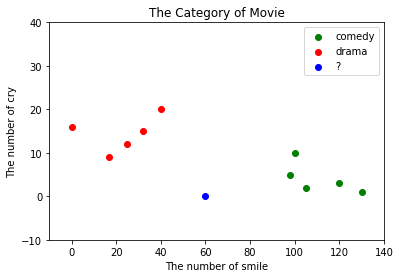

'comedy'

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dataset = np.array([
    [120, 3],
    [105, 2],
    [25, 12],
    [32, 15],
    [17, 9],
    [98, 5],
    [130, 1],
    [0, 16],
    [40, 20],
    [100, 10]
])

labels = np.array(["comedy", "comedy", "drama",
                   "drama","drama","comedy","comedy",
                   "drama","drama","comedy"])

inX = np.array([60,0])

plt.title("The Category of Movie")
plt.scatter(dataset[labels=="comedy",0],dataset[labels=="comedy",1],
            label='comedy', c='g')
plt.scatter(dataset[labels=="drama",0],dataset[labels=="drama",1],
            label='drama', c='r')
plt.scatter(inX[0],inX[1],label="?",
            c='b')



plt.xlim(-10,140)
plt.ylim(-10,40)

plt.xlabel('The number of smile')
plt.ylabel('The number of cry')
plt.legend()
plt.show()


def classify_knn(inX, dataset, labels, K):
    dists = 0
    dists = dataset - inX

    dists = np.array(np.sqrt(dists[:,0]**2 + (dists[:,1]*10)**2)) # 거리 계산, 코미디 태그를 가진 데이터가 갖고있는 웃음횟수와 울음횟수의 비율을 이용하여 계산시 추가로 곱함
    
    sorted_index = np.argsort(dists) # 거리순 정렬
    sorted_labels = np.array(labels[sorted_index[:]]) # 라벨 거리순으로 정렬
    K_nearest_labels = sorted_labels[:K] # K 개만큼 데이터 추출
    count_dict = {}
    for label in K_nearest_labels:
      count_dict[label] = count_dict.get(label,0) + 1 # 추출한 데이터에서 라벨의 등장횟수 count 
    _labels, count_labels = np.unique(list(count_dict.keys())), np.unique(list(count_dict.values()))
    return _labels[count_labels.argmax()] # 결과 반환


classify_knn(inX,dataset,labels,4)